# Final Project

https://www.cs.cmu.edu/~./enron/

https://lionbridge.ai/datasets/the-best-25-datasets-for-natural-language-processing/

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('yelp.csv')

In [4]:
df.head()

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,...,"Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",bkHUOCicGZ856vpvcWuW7Q,93z0yh-sUpGZS-cSKu6xxA,5.0,1,0,0,Stopped in on a busy Friday night. Despite the...,2018-03-04 00:59:21
1,1,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,...,"Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",VKBc48PPwyWIUE1RhBT_8A,Q_CZIvnsDHjpls-EPzzG7Q,2.0,0,0,0,Went there about 1 PM on a Monday. It wasn't ...,2018-08-14 05:22:00
2,2,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,...,"Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",JKNv1l7JgayZjG6nK__hXQ,rqxTSFFj5fZNmabY1fmTlw,5.0,0,0,0,This was the place the be on Friday Night! If ...,2018-03-17 14:22:48
3,3,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,...,"Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",WNM_Oyzy6mB6n0Z9lcuZyQ,vNPxlt5f50q0e2nVAScW3Q,4.0,0,0,0,Went to this place with my family over the wee...,2018-04-04 21:16:50
4,4,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,...,"Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",jG4gZz5FrHyItJXz1YV9Sw,eXRC79iX60xwA1UuGRuWNg,4.0,0,0,0,"Stopped on a midweek afternoon, and so glad th...",2018-04-28 19:17:04


In [6]:
df.shape

(100000, 23)

In [26]:
df.dropna(inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90652 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    90652 non-null  int64  
 1   business_id   90652 non-null  object 
 2   name          90652 non-null  object 
 3   address       90652 non-null  object 
 4   city          90652 non-null  object 
 5   state         90652 non-null  object 
 6   postal_code   90652 non-null  object 
 7   latitude      90652 non-null  float64
 8   longitude     90652 non-null  float64
 9   stars_x       90652 non-null  float64
 10  review_count  90652 non-null  int64  
 11  is_open       90652 non-null  int64  
 12  attributes    90652 non-null  object 
 13  categories    90652 non-null  object 
 14  hours         90652 non-null  object 
 15  review_id     90652 non-null  object 
 16  user_id       90652 non-null  object 
 17  stars_y       90652 non-null  float64
 18  useful        90652 non-nu

In [28]:
df.describe()

,Unnamed: 0,latitude,longitude,stars_x,review_count,is_open,stars_y,useful,funny,cool
count,90652.000000,90652.000000,90652.000000,90652.000000,90652.000000,90652.000000,90652.000000,90652.000000,90652.000000,90652.000000
mean,49910.967006,38.388298,-92.761164,3.749553,424.954441,0.789326,3.802122,0.958159,0.326943,0.368442
std,28856.056423,6.995978,19.664805,0.639462,669.488860,0.407789,1.356135,2.103017,1.188846,1.193597
min,0.000000,28.136102,-123.259393,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,24887.750000,30.341274,-122.475356,3.500000,79.000000,1.000000,3.000000,0.000000,0.000000,0.000000
50%,49864.500000,42.252270,-84.379134,4.000000,214.000000,1.000000,4.000000,0.000000,0.000000,0.000000
75%,74821.250000,45.360003,-71.226121,4.000000,477.000000,1.000000,5.000000,1.000000,0.000000,0.000000
max,99999.000000,49.337106,-70.801636,5.000000,4708.000000,1.000000,5.000000,128.000000,39.000000,47.000000


In [29]:
df.corr()

,Unnamed: 0,latitude,longitude,stars_x,review_count,is_open,stars_y,useful,funny,cool
Unnamed: 0,1.000000,0.027122,-0.001471,0.005680,-0.076037,-0.000698,0.001007,0.010128,0.004471,0.002770
latitude,0.027122,1.000000,-0.370833,-0.036338,-0.122304,-0.066382,-0.011122,0.012505,0.013297,-0.004167
longitude,-0.001471,-0.370833,1.000000,-0.089824,-0.033865,0.041391,-0.047996,-0.006204,-0.016598,-0.024571
stars_x,0.005680,-0.036338,-0.089824,1.000000,0.165489,0.143006,0.432203,-0.040744,-0.032747,0.034888
review_count,-0.076037,-0.122304,-0.033865,0.165489,1.000000,0.103360,0.074133,-0.059592,-0.010737,-0.004998
is_open,-0.000698,-0.066382,0.041391,0.143006,0.103360,1.000000,0.073665,-0.026538,-0.023984,-0.023038
stars_y,0.001007,-0.011122,-0.047996,0.432203,0.074133,0.073665,1.000000,-0.101505,-0.079981,0.060525
useful,0.010128,0.012505,-0.006204,-0.040744,-0.059592,-0.026538,-0.101505,1.000000,0.547144,0.657178
funny,0.004471,0.013297,-0.016598,-0.032747,-0.010737,-0.023984,-0.079981,0.547144,1.000000,0.662081
cool,0.002770,-0.004167,-0.024571,0.034888,-0.004998,-0.023038,0.060525,0.657178,0.662081,1.000000


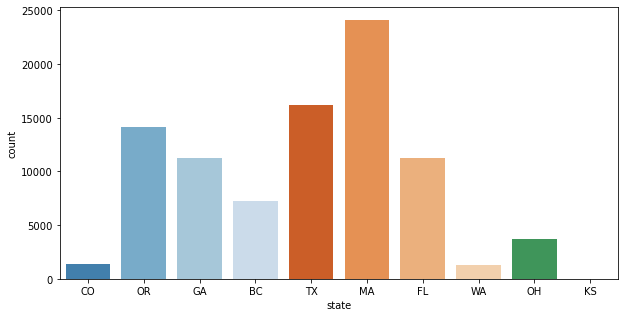

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='state', palette='tab20c');

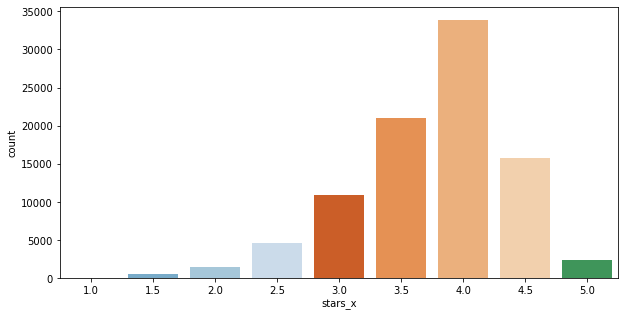

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="stars_x", palette='tab20c');